In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab as py
import scipy.linalg as la
import statistics
import scipy.stats as stats
import scipy

from math import gamma as tma
import itertools
from scipy.stats import laplace
from scipy.stats import logistic
from scipy.stats import cauchy
from scipy.stats import binom
from scipy.stats import weibull_min as weibull
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import t as studt
from scipy.stats import f as fdist
from scipy.stats import chisquare as chisq
from scipy.stats import chi2
from scipy.stats import gaussian_kde as gkde
from sklearn.neighbors import KernelDensity
import math
import sympy as sym

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

import warnings
warnings.filterwarnings('ignore')

#### Exercise 6.3.1

The following data were generated from an exponential distribution with pdf
$$f(x;\theta) = (1/\theta)e^{−x/\theta},$$ for $x > 0,$ where $\theta = 40.$

(a) Histogram the data and locate $\theta_0 = 50$ on the plot.

(b) Use the test described in Example $6.3.1$ to test $H0 : \theta = 50$ versus $H1 : \theta \neq 50.$ Determine the decision at level $\alpha = 0.10.$

19 15 76 23 24 66 27 12 25 7 6 16 51 26 39

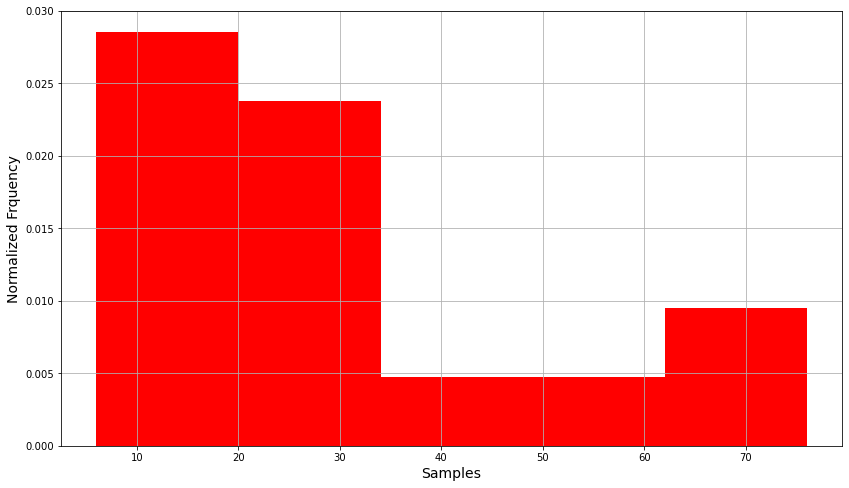

In [2]:
# (a)

x = [19,15,76,23,24,66,27,12,25,7,6,16,51,26,39]

plt.figure(figsize=(14,8))

plt.hist(x,bins=5,color='r',density=True)
plt.xlabel('Samples',fontsize=14)
plt.ylabel('Normalized Frquency',fontsize=14)
plt.grid()
plt.show()

In [3]:
# (b)

def dxc2(a,t,dof):
    return (chi2.cdf(a, dof)-t)
def invert_chi2(t,dof):
    a = 0
    b = 100.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxc2(c,t,dof)) > tol):
        c = (a+b)/2
        if(dxc2(c,t,dof) < 0):
            a = c
        else:
            b = c
    return c

In [4]:
theta0 = 50
n=len(x)
print((invert_chi2(0.05,2*n),invert_chi2(0.95,2*n)))
print(2*np.sum(x)/theta0)

(18.49212646484375, 43.77288818359375)
17.28


#### Exercise 6.3.2. 

Consider the decision rule $(6.3.5)$ derived in Example $6.3.1.$ Obtain the distribution of the test statistic under a general alternative and use it to obtain the power function of the test. Using R, sketch this power curve for the case when $\theta_0 =1,$ $n=10,$ and $\alpha=0.05.$

The sum of $n$ exponential random samples follows $\Gamma(n,\theta)$ distribution. Hence $\sum_{i=1}^n 2X_i/\theta$ follows $\Gamma(n,2)$ distribution which is $\chi^2(2n)$.

Decision rule $(6.3.5)$ under the alternative then translates to the power function given by $$\gamma(\theta) = F\left(\frac{\theta_0 \chi^2_{\alpha/2}(2n)}{\theta}\right) + 1-F\left(\frac{\theta_0 \chi^2_{1-\alpha/2}(2n)}{\theta}\right),$$ where $F(.)$ is the cdf of $\chi^2(2n)$ distribution. 

In [5]:
t0 = 1
n = 10
a = 0.05
cl = t0*invert_chi2(a/2,2*n)
ch = t0*invert_chi2((1-a/2),2*n)

In [6]:
t = [i/100 for i in range(1,201,1)]
pwr = []

for ti in t:
    p = chi2.cdf(cl/ti,2*n)+1-chi2.cdf(ch/ti,2*n)
#     p = gamma.cdf(cl, n, loc=0, scale=(ti/n))+1-gamma.cdf(ch, n, loc=0, scale=(ti/n))
    pwr.append(p)

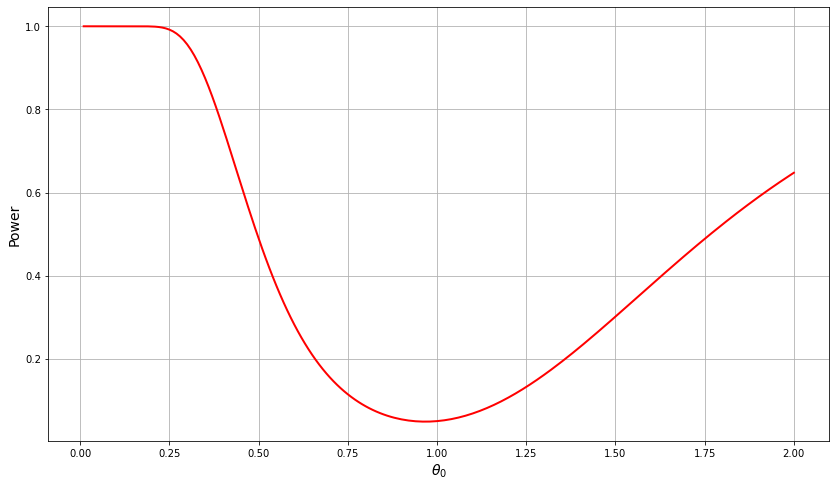

In [7]:
plt.figure(figsize=(14,8))

plt.plot(t,pwr,color='r',linewidth=2)
plt.xlabel('$\\theta_0$',fontsize=14)
plt.ylabel('Power',fontsize=14)
plt.grid()
plt.show()

#### Exercise 6.3.3. 

Show that the test with decision rule (6.3.6) is like that of Example 4.6.1 except that here $\sigma^2$ is known.

Solution is in the solutions manual (as usual, they give out solutions to the trivial ones!!). As Tomoki Okuno points out, there is not much to be shown here. We know the variance, and also the fact that the distribution is that of Normal, so the expression is exact and not approximate.

#### Exercise 6.3.4. 

Obtain an R function that plots the power function discussed at the end of Example $6.3.2.$ Run your function for the case when $\theta_0 = 0,$ $n = 10,$ $\sigma^2 = 1,$ and $\alpha = 0.05.$

As mentioned in the text, power function is given by Equation $(4.6.5)$ $$\gamma(\theta) = \Phi \left( \frac{\sqrt{n}(\theta_0-\theta)}{\sigma} - z_{\alpha/2} \right)+1-\Phi \left( \frac{\sqrt{n}(\theta_0-\theta)}{\sigma} + z_{\alpha/2} \right).$$

In [8]:
def dx(a,t):
    return (norm.cdf(a, loc=0, scale=1)-t)
def invert_norm(t):
    a = 10.0
    b = -10.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dx(c,t)) > tol):
        c = (a+b)/2
        if(dx(c,t) > 0):
            a = c
        else:
            b = c
    return c

In [9]:
a=0.05
zaby2 = invert_norm(1-a/2)
print(zaby2)

1.9598388671875


In [10]:
n=10
s2 = 1
t0=0

t = [i/100 for i in range(-200,201,1)]
pwr = []

for ti in t:
    xt = np.sqrt(n/s2)*(t0-ti)
    p = norm.cdf(xt - zaby2, loc=0, scale=1)+1-norm.cdf(xt + zaby2, loc=0, scale=1)
    pwr.append(p)

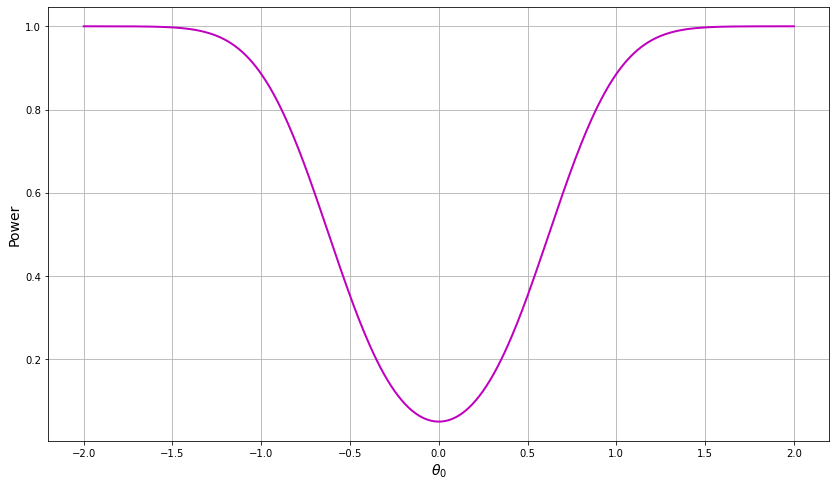

In [11]:
plt.figure(figsize=(14,8))

plt.plot(t,pwr,color='m',linewidth=2)
plt.xlabel('$\\theta_0$',fontsize=14)
plt.ylabel('Power',fontsize=14)
plt.grid()
plt.show()

#### Exercise 6.3.5. 

Consider Example $6.3.4.$

(a) Show that we can write $S^∗ = 2T − n,$ where $T = \#{X_i > \theta_0}.$

(b) Show that the scores test for this model is equivalent to rejecting $H_0$ if $T < c_1$ or $T > c_2.$

(c) Show that under $H_0,$ $T$ has the binomial distribution $b(n,1/2);$ hence, determine $c_1$ and $c_2$ so that the test has size $\alpha$.

(d) Determine the power function for the test based on $T$ as a function of $\theta$.

(a) With $H_0$ being true, $X_i-\theta_0$ follows Laplace distribution which is such that $P(X_i > \theta_0) = P(X_i \leq \theta_0) = 0.5$. The required function is then equal to $S^* = +1\times T + -1 \times (n-T) = 2T-n$ where $T$ is the number of samples greater than $\theta_0$.

(b) Based on equation $(6.3.20),$ we need the test statistic $\chi^2_R \geq \chi^2_{\alpha}(1)$. So $$\frac{(2T-n)^2}{n} \geq \chi^2_{\alpha}(1)$$ which modifies to $$\frac{n-\sqrt{n\chi^2_{\alpha}(1)}}{2} \leq T \leq \frac{n+\sqrt{n\chi^2_{\alpha}(1)}}{2}.$$ So we reject $H_0$ if $T \leq c_1$ or $T \geq c_2$ where $c_1$ and $c_2$ can be obtained from the above inequality.

(c) As mentioned above in part (a), under $H_0$, we have equal probability of each sample being on either side of $\theta_0$ thereby making the distribution of $T$ as that of $b(n,1/2)$. So we can find $c_1$ and $c_2$ such that $P(T \leq c_1) = P(T \geq c_2) = \alpha/2.$ If $F(.)$ represents the cdf of the binomial distribution, then $c_1$ is the greatest integer for which $F(c_1) \leq \alpha/2$ and $c_2$ is the smallest integer such that $1-F(c_2) \geq \alpha/2.$

(d) Basically the power function is given by equation $(4.5.5)$. If $\theta \neq \theta_0$, then we wish to maximize the probability that the sample belongs to the critical region. In case $\theta \neq \theta_0$, then $T$ is not distributed as $b(n,1/2)$ anymore. It is still binomial but with a different probability which is now a function of $\theta$. If $G(x)$ is the pdf of the standard laplace (or double exponential) distribution, then $p(\theta) = G(\theta-\theta_0)$.

The power function is then given by $$\gamma(\theta) = F_{p(\theta)}(c_1) + 1 - F_{p(\theta)}(c_2),$$ where $F(.)$ is the cdf of $b(n,p(\theta))$ distribution where $p(\theta)$ is now given as described earlier.

#### Exercise 6.3.6. 

Let $X_1,X_2,...,X_n$ be a random sample from a $N(\mu_0,\sigma^2 = \theta)$ distribution, where $0<\theta<\infty$ and $\mu_0$ is known. Show that the likelihood ratio test of $H_0 : \theta=\theta_0$ versus $H_1 : \theta \neq \theta_0$ can be based upon the statistic $W = \sum_{􏰋i=1}^n (X_i − \mu_0)^2/\theta_0.$ Determine the null distribution of $W$ and give, explicitly, the rejection rule for a level $\alpha$ test.

Tomoki Okuno has complete solution for this question.

#### Exercise 6.3.7. 

For the test described in Exercise $6.3.6,$ obtain the distribution of the test statistic under general alternatives. If computational facilities are available, sketch this power curve for the case when $\theta_0 =1,$ $n=10,$ $\mu=0,$ and $\alpha=0.05.$

Expression for the power function is actually given in the solutions manual. The R code given in the solutions manual has been converted to Python code using the online code converter tool in https://www.codeconvert.ai/r-to-python-converter

In [12]:
def pcchitst(n=10, alpha=0.05, theta0=1, theta=1):
    alp2 = alpha / 2
    l = (theta0 / theta) * chi2.ppf(alp2, n)
    u = (theta0 / theta) * chi2.ppf(1 - alp2, n)
    pcchitst = chi2.cdf(l, n) + 1 - chi2.cdf(u, n)
    return pcchitst

In [13]:
t0 = 1
n = 10
a = 0.05

In [14]:
t = [i/100 for i in range(1,201,1)]
pwr = []

for ti in t:
    p = pcchitst(n,a,t0,ti)
    pwr.append(p)

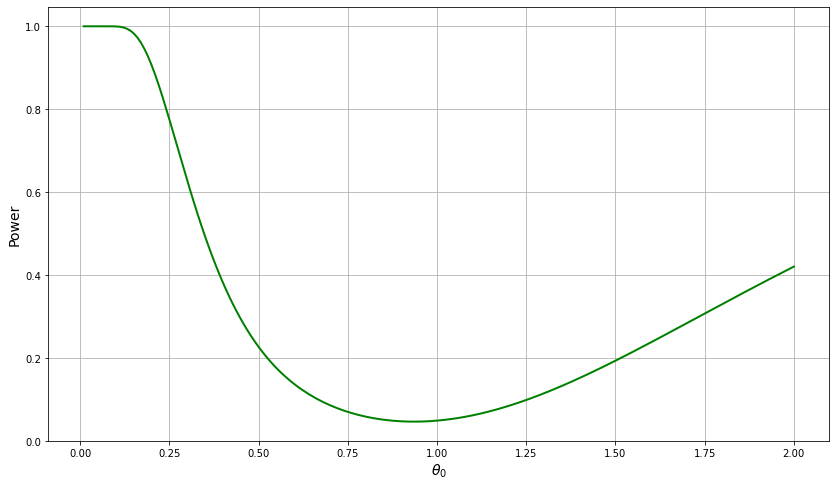

In [15]:
plt.figure(figsize=(14,8))

plt.plot(t,pwr,color='g',linewidth=2)
plt.xlabel('$\\theta_0$',fontsize=14)
plt.ylabel('Power',fontsize=14)
plt.grid()
plt.show()

#### Exercise 6.3.8. 

Using the results of Example $6.2.4,$ find an exact size α test for the hypotheses $(6.3.21).$

The statistic $W=-\sum_{i=1}^n \log{X_i}$ has $\Gamma(n,1/\theta)$ distribution. To get the exact size $\alpha$ test, we need to find $w_u$ and $w_l$ such that $1-F(w_u) \leq \alpha/2$ and $F(w_l) \leq \alpha/2$ where $F(.)$ is the pdf of $W$ under null i.e $\Gamma(n,1)$.

Tomoki Okuno has full solutions to Exercises 6.3.9, 6.3.10, 6.3.11, 6.3.12, 6.3.17, 6.3.18, 6.3.19.

Exercise 6.3.16 has solution given in the solutions manual under Exercise 6.3.15.

#### Exercise 6.3.13. 

Let $X_1,X_2,...,X_n$ be a random sample from the beta distribution with $\alpha = \beta = \theta$ and $\Omega = {\theta : \theta = 1,2}.$ Show that the likelihood ratio test statistic $\Lambda$ for testing $H_0 :\theta=1$ versus $H_1 : \theta=2$ is a function of the statistic $W = \sum_{i=1}^n \log{X_i} + \sum_{i=1}^n \log{(1-X_i)}.$

Long story short, we can show that $$\begin{align} \Lambda &= 2^n \prod_{i=1}^nX_i(1-X_i) \\ &= 2^ne^{W},\end{align}$$ which is an increasing function of the statistic $W$.

#### Exercise 6.3.14. 

Consider a location model

\begin{equation*} X_i = θ + e_i, \: \: \: \: i = 1,...,n, \label{eq6p3p14d1} \tag{6.3.25} \end{equation*}

where $e_1,e_2,...,e_n$ are iid with pdf $f(z)$. There is a nice geometric interpretation for estimating $\theta$. Let $\pmb{X} = (X_1,...,X_n)′$ and $\pmb{e} = (e_1,...,e_n)′$ be the vectors of observations and random error, respectively, and let $\pmb{\mu} = \theta \textbf{1}$, where $\textbf{1}$ is a vector with all components equal to 1. Let $V$ be the subspace of vectors of the form $\pmb{\mu}$; i.e.,$V =\{ \textbf{v}:\textbf{v}=a\textbf{1}, \text{for some $a \in \mathbb{R}$ }\}.$ 

Then in vector notation we can write the model as
\begin{equation*}
\pmb{X}=\pmb{\mu}+\pmb{e}, \: \: \: \: \pmb{μ} \in V. \label{eq6p3p14d2} \tag{6.3.26}
\end{equation*}

Then we can summarize the model by saying, “Except for the random error vector $\pmb{e}$, $\pmb{X}$ would reside in V .” Hence, it makes sense intuitively to estimate $\pmb{\mu}$ by a vector in $V$ that is “closest” to $\pmb{X}$. That is, given a norm $\left\lVert \cdot \right\rVert$ in $\mathbb{R}^n$, choose \begin{equation*} \pmb{\hat{\mu}}􏰦 = \text{Argmin} \lVert \pmb{X} − \pmb{v}\rVert, \: \: \: \: \pmb{v} \in V. \label{eq6p3p14d3} \tag{6.3.27} \end{equation*}

(a) If the error pdf is the Laplace, $(2.2.4),$ show that the minimization in $(6.3.27)$ is equivalent to maximizing the likelihood when the norm is the $l_1$ norm given by 􏰂
\begin{equation*} \lVert \pmb{v}\rVert_1 = \sum_{i=1}^n \lvert v_i \rvert. \label{eq6p3p14d4} \tag{6.3.28} \end{equation*}

(b) If the error pdf is the $N (0, 1)$, show that the minimization in $(6.3.27)$ is equivalent to maximizing the likelihood when the norm is given by the square of the $l_2$ norm
\begin{equation*} \lVert \pmb{v}\rVert^2_2 = \sum_{i=1}^n v^2_i. \label{eq6p3p14d5} \tag{6.3.29} \end{equation*}

(a) Basically \begin{align}\text{Argmin} \lVert \pmb{X} − \pmb{v}\rVert &= \underset{a \in \mathbb{R}}{\text{Argmin}} \sum_{i=1}^n \lvert x_i - a \rvert \\ &=  \underset{a \in \mathbb{R}}{\text{Argmax}} \frac{\exp{\left \{-\sum_{i=1}^n \lvert x_i - a \rvert\right\}}}{2^n} \\ &= \underset{a \in \mathbb{R}}{\text{Argmax}} \: L(a), \end{align} where $L(a)$ is the likelihood function for Laplace pdf centered at $a$.

(b) Similar to (a), \begin{align}\text{Argmin} \lVert \pmb{X} − \pmb{v}\rVert^2 &= \underset{a \in \mathbb{R}}{\text{Argmin}} \sum_{i=1}^n \left( x_i - a \right)^2 \\ &=  \underset{a \in \mathbb{R}}{\text{Argmax}} \frac{\exp{\left \{-\sum_{i=1}^n \left ( x_i - a \right )^2 /2 \right \}}}{(2\pi)^{(n/2)}} \\ &= \underset{a \in \mathbb{R}}{\text{Argmax}} \: L(a), \end{align} where $L(a)$ is the likelihood function for pdf of $N(a,1)$.

#### Exercise 6.3.15. 

Continuing with Exercise $6.3.14,$ besides estimation there is also a nice geometric interpretation for testing. For the model $(6.3.26),$ consider the hypotheses 

\begin{equation*}H_0 : \theta=\theta_0  \: \textrm{versus} \: H_1 : \theta \neq \theta_0, \label{eq6p3p14d6} \tag{6.3.30} \end{equation*}

where $θ_0$ is specified. Given a norm $\lVert \cdot \rVert$ on $\mathbb{R}^n$, denote by $d(\pmb{X}, V )$ the distance between $\pmb{X}$ and the subspace V ; i.e., $d(\pmb{X}, V ) = \lVert \pmb{X} − \pmb{\hat{\mu}} 􏰦\rVert,$ where $\pmb{\hat{\mu}}$􏰦 is defined in equation $(6.3.27).$ If $H_0$ is true, then $\pmb{\hat{\mu}}$􏰦 should be close to $\pmb{\mu} = \theta_0 \pmb{1}$ and, hence, $\lVert \pmb{X} − \theta_0\pmb{1}\rVert$ should be close to $d(\pmb{X}, V ).$ 

Denote the difference by 

\begin{equation*} RD = \lVert \pmb{X} − \theta_0 \pmb{1} \rVert − \lVert \pmb{X} − \pmb{\hat{\mu}}􏰦 \rVert . \label{eq6p3p14d7} \tag{6.3.31} \end{equation*} 

Small values of $RD$ indicate that the null hypothesis is true, while large values indicate $H_1$. So our rejection rule when using $RD$ is

\begin{equation*} \textrm{Reject} \: H_0 \: \textrm{in favor of} \: H_1 \: \textrm{if} \: RD > c. \label{eq6p3p14d8} \tag{6.3.32} \end{equation*}

(a) If the error pdf is the Laplace, $(6.1.6),$ show that expression $(6.3.31)$ is equivalent to the likelihood ratio test when the norm is given by $(6.3.28).$

(b) If the error pdf is the $N(0,1),$ show that expression $(6.3.31)$ is equivalent to the likelihood ratio test when the norm is given by the square of the $l_2$ norm, $(6.3.29).$

Consider $\Lambda = L(\theta_0)/L(\theta)$. In LRT test, we reject $H_0$ in favor of $H_1$ when $\Lambda \leq c'$ where $c'$ is such that $\alpha = P_{\theta_0} [\Lambda \leq c'].$ In each of the above cases, the norms are defined in such a way that $RD \propto -\log{(\Lambda)}$ which has an immediate consequence that the equivalent rejection rule will be that given by $(6.3.32)$ for an appropriate value for $c$ dependent on $c'$.